# Probability and information entropy

Agenda:
- microstates vs macrostates
- emerging collective behavior
- universality (CLT)
- entropy vs energy
- probability recap 

Reading:
- Arovas, Ch. 1
- Kardar, Ch. 2

## Coin flipping  

We will use the simple example of repeatedly flipping a biased coin as a warm-up excercise to illustrate key concepts in statistical physics. 

Coin flipping arises in many context:
- spatial configuration of magnetic moments: 1D Ising spin chain 
- time series of left- or right steps in a random walk or a polymer (1D freely jointed chain)

### Setup

We assume that the coin is flipped $N$ times (~"volume" of spin chain) and describe the outcome of coin flip $i$ as $\sigma_{i} \in\{-1,+1\}$.

For a single coin flip, the probabilities of heads and tails are 

$$P\left(\sigma_{i}\right)=\left\{\begin{array}{l}p \;, \quad\sigma=1 \\ q=1-p\;, \quad \sigma=-1\end{array}\right.\;,$$

which can also be concisely expressed as $P\left(\sigma_{i}\right)=p \cdot \delta_{\sigma_i 1}+q \delta_{\sigma_i 0}$, which is sometimes useful.

Since coin flips are uncorrelated (by assumption), the probability of observing a particular configuration is given by

$$
\begin{aligned}
P\left(\sigma_{1}, \sigma_{2}, \ldots\right) & = \prod_{j} P\left(\sigma_{j}\right) \\
& \text { (uncorrelated spins) }
\end{aligned}
$$

In principle, everything one can say about the statistics of coin flips follows from this expression.  

*Question:* Compare

$$
\begin{aligned}
& A=\{++--+++-+-+++---+++-+-++-+\} \\
& B=\{++++++++++++++++++++++++++\} \\
& C=\{+-+-+-+-+-+-+-+-+-+-+-+-+-\}
\end{aligned}
$$

If $p=q=\frac{1}{2}, P(A)=P(B)=P(C)$. So, why does $B$ (and $C$?) look exceptional?

### Coarse-graining

In the realm of statistical physics, the concept of **coarse-graining** plays a pivotal role in understanding the transition from microscopic to macroscopic descriptions. The entire configuration of a system, denoted by $\{\sigma\} = \left\{\sigma_{1}, \sigma_{2}, \ldots\right\}$, represents the **micro-state**. The set of all micro-states encompasses all possible configurations at the most fundamental level.


But, usually, we cannot directly observe all degrees of freedom of a microstate. Instead, we measure certain observables that have the same value for many microstates. For example, we typically cannot measure all spins in a magnet but just a sum over all spins. In a magnet, for instance, we care about the magnetization, 

$$X \equiv \sum_{j=1}^{N} \sigma_{j}\;,$$

which is the difference $X=N_+-N_-$ between up- and down-spins. (Likewise, when we stare at a coin flip series of 1's and 0's our brains tend to quickly notice if there's a mismatch between 1's and 0's.) 

Since $\{\sigma\} \rightarrow X$ is a many-to-one mapping, we call $X$ a macroscopic observable. By fixing the value of $X$, we effectively define what is known as a **macro-state**.

A typical objective in statistical physics is to transition from the probability distribution of micro-states, $P(\{\sigma\})$, to that of macro-states, $P(X)$. What generically happens during this transition is a fundamental aspect that we will explore now,  using coin flipping.

The probability of $X$ is naturally represented as a product of the number $\binom{N}{N_+}$ of possible microstates (aka microscopic configurations) and the probability $p^{N_{+}}q^{N_{-}}$ to observe anyone of the microstates. We thus obtain the binomial distribution

$$
P(X)=P(N_+,N_+)=\underbrace{\frac{N!}{N_{+}! N_{-}!}}_{\equiv e^{S(X)}} \quad \underbrace{p^{N_{+}}q^{N_{-}}}_{\equiv e^{-E(X)}}
$$

$$
P(X)= e^{S(X)}e^{-E(X)}
$$

Here, we introduced the quantities $S(X)$ as the log of the number of microstates and $E(X)$ as the log-probability of the microstates. Up to pre-factors, these quantities are **entropy** and **energy** in statistical physics. They always compete with one another ....  


$$
\begin{aligned}
& S=\ln (N !)-\ln \left(N_{+} !\right)-\ln \left(N_{-} !\right)
\end{aligned}
$$

Using Stirling's approximation

$$\ln N !=N(\ln N-1)+O(\ln N)$$ 

we find for the entropy

$$
S \approx-N\left(\frac{1+x}{2} \ln \left(\frac{1+x}{2}\right)+\frac{1-x}{2} \ln \left(\frac{1-x}{2}\right)\right)\;,
$$ (entropy-coin-flipping)

where we introduced the specific magnetization $x=X/N$. 

The energy can be written as 

$$
\begin{aligned}
E(x) & =-\ln \left(p^{N_{+}} q^{N_{-}}\right)=-N_{+} \ln (p)-N_{-} \ln (q) \\
& =-N\left[\frac{1+x}{2} \ln p+\frac{1-x}{2} \ln q\right] \\
& =-\frac{N}{2}\left[\ln (p q)+x \ln \frac{p}{q}\right]
\end{aligned}
$$

```{note}
For large $N$, both entropy $S\propto N$ and energy $S\propto N$ have a very simple, linear dependence on $N$. Macroscopic observables that grow linearly with the system size are called **extensive**. These are in contrast to **intensive** quanitites, which approach a constant in the thermodynamic limit of large systems, for example $x=X/N$ which is bounded between -1 and 1. 

**Throughout this course, we use capital/lower case letters to indicate extensive/intensive quantities.**
```


Let's have a look at their competition:

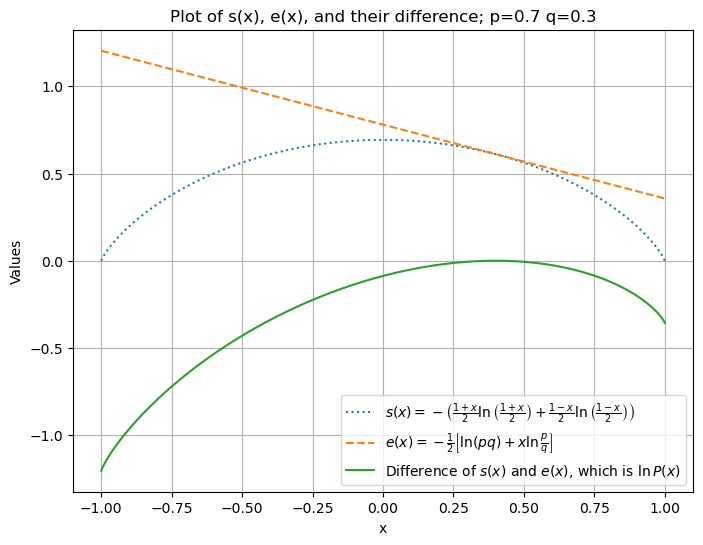

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function s(x)
def s(x):
    return -(1+x)/2 * np.log((1+x)/2) - (1-x)/2 * np.log((1-x)/2)

# Create an array of x values from -1 to 1
x = np.linspace(-1, 1, 400)

# Avoid division by zero and log of zero by slightly adjusting the range
x = np.clip(x, -0.999999, 0.999999)

# Compute s(x) for these x values
y = s(x)


# Define the function e(x) with p = 0.7 and q = 0.3
p = 0.7
q = 0.3

def e(x):
    return -0.5 * (np.log(p * q) + x * np.log(p / q))

# Compute e(x) for the same x values
y_e = e(x)

# Compute the sum of s(x) and e(x)
y_sum = y - y_e

# Create the plot with s(x), e(x), and their difference
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$s(x)=-\left(\frac{1+x}{2} \ln \left(\frac{1+x}{2}\right)+\frac{1-x}{2} \ln \left(\frac{1-x}{2}\right)\right)$', linestyle='dotted')
plt.plot(x, y_e, label=r'$e(x)=-\frac{1}{2}\left[\ln (pq)+x \ln \frac{p}{q}\right]$', linestyle='dashed')
plt.plot(x, y_sum, label=r'Difference of $s(x)$ and $e(x)$, which is $\ln P(x)$')
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Plot of s(x), e(x), and their difference; p='+str(p)+' q='+str(q))
plt.legend()
plt.grid(True)
plt.show();



Notice:
- The entropy has a maximum at the neutral point $x = 0$ and vanishes at the boundaries (all spin up / down)
- "Low energy" states have higher probab.
- The competition between $e(x)$ and $s(x)$ leads to a maximum of in the sum $s(x)-e(x)$.
- Later, we will rather look at the negative, $e(x)-s(x)=:f(x)$, which we call a free energy. It is generally a convex function and has a *minimum* at the most likely value of $x$.

```{note}
The depicted maximum in $-f(x)$ does not look very impressive. But, since we have

$$P(x)=e^{-N f(x)}, $$

a so-called (large deviation principle)[https://en.wikipedia.org/wiki/Large_deviations_theory], we will get a pronounced maximum at $x=p- q$ (the minimum of $f(x)$) for even modestly large $N$. Fully deterministic behavior $x \to p-q$ emerges in the thermodynamic limit, $N\to \infty$. The most likely value of $x$ coincides with the expectation value $\langle x \rangle = p-q$, see below. 
```


We can explore the effects of finite $N$ by Taylor expanding $S(x)-E(x)$ to $O(\Delta x^2)\equiv O\left[(x-\langle x\rangle)^{2}\right]$, we obtain to leading order a Gaussian,

$$
P(x) \approx C e^{-\left[\frac{(\Delta x)^{2}}{2 \langle \Delta x \rangle^2}+O\left(\frac{1}{N}\right)\right]} \;,
$$

whose spread is controled by the variance $\langle \Delta x^2\rangle = 4pq N^{-1/2}$ and the variance. 



```{note}
One can show that, quite generally, large sums of random variables tend to Gaussians if correlations are short ranged. This is a consequence of the Central Limit Theorem. The Gaussian is completely fixed by knowing the first and second moment of the distribution. Since the first two moments can often be determined quite easily (see below), this is a great advantage for calculations. The scaling $\langle \Delta x^2\rangle\sim N^{-1/2}$ and the fact that the limiting distribution is independent of the higher order details of the distributions of individual random numbers is a first example of **universality**.   
```

#### Calculation of first and second moment

The $n^\text{th}$ moment of a random variable X is $\langle X^n\rangle$. The first and second moment of a distribution can often be computed analytically, and those are needed in the context of the CLT. Higher order moments are often more challenging to obtain.

##### Expectation value

$$
\begin{aligned}
\langle X\rangle & =\sum_{\{\sigma\}} P(\{\sigma\}) X(\{\sigma\})= \\
& =\sum_{\{\sigma\}}\left[\prod_{j} P\left(\sigma_{j}\right)\right]\left[\sum_{i} \sigma_{i}\right] \\
& =\sum_{j} \sum_{\sigma_{j}} P\left(\sigma_{j}\right) \cdot \sigma_{j} \\
& =\sum_{j}(p-q)=N(p-q)
\end{aligned}
$$

So, we see that the expectation value of X is an **extensive** quantity.

Of course, a particular realization will (usually!) not have $X=\langle X\rangle$. 

One measure of spread is the

##### Variance

$$
\operatorname{var}(X) \equiv\langle\underbrace{(X-\langle X\rangle)^{2}}_{\equiv \Delta X^2}\rangle=\left\langle X^{2}\right\rangle-\langle X\rangle^{2} .
$$

To compute $\left\langle X^{2} \right\rangle$:


$$
\begin{aligned}
& \left\langle X^{2}\right\rangle=\sum_{\{\sigma\}} P(\{\sigma\}) X^{2}(\{\sigma\}) \\
& =\sum_{\{ \sigma \}} P(\{\sigma\}) \sum_{i, j} \sigma_{i} \cdot \sigma_{j}=\sum_{i, j}\left\langle\sigma_{i} \sigma_{j}\right\rangle 
\end{aligned}
$$

if $i=j: \sigma_{i} \cdot \sigma_{i}=1 \text {, so }\left\langle\sigma_{i} \cdot \sigma_{i}\right\rangle=1$

if $j\neq j: \left\langle\sigma_{i} \sigma_{j}\right\rangle=\left\langle\sigma_{i}\right\rangle\left\langle\sigma_{i}\right\rangle=(p-q)^{2}$

So, $\left\langle X^{2}\right\rangle=N+N(N-1)(p-q)^{2}$
v. $\langle X\rangle^{2}=N^{2}(p-q)^{2}$

$$
\begin{aligned}
\left\langle X^{2}\right\rangle-\langle X\rangle^{2} & =N\left(1-(p-q)^{2}\right) . \\
\operatorname{var}(X) & =4 \mathrm{Npq} .
\end{aligned}
$$

Note: Since $\Delta X \propto \sqrt{N}$ but $\langle X\rangle\propto N$, we have $\frac{\Delta x}{\langle x\rangle} \sim N^{-1/2}\rightarrow 0$ for $p \neq q$ as $N\to \infty$.

The $\sqrt{N}$ scaling is a general consequence of the C.L.T..

### Simulating coin-flips

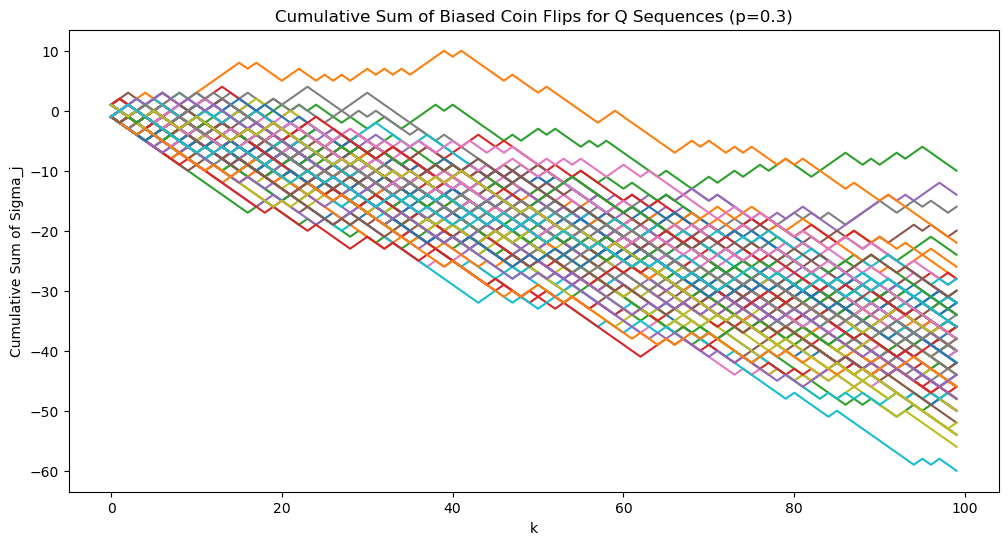

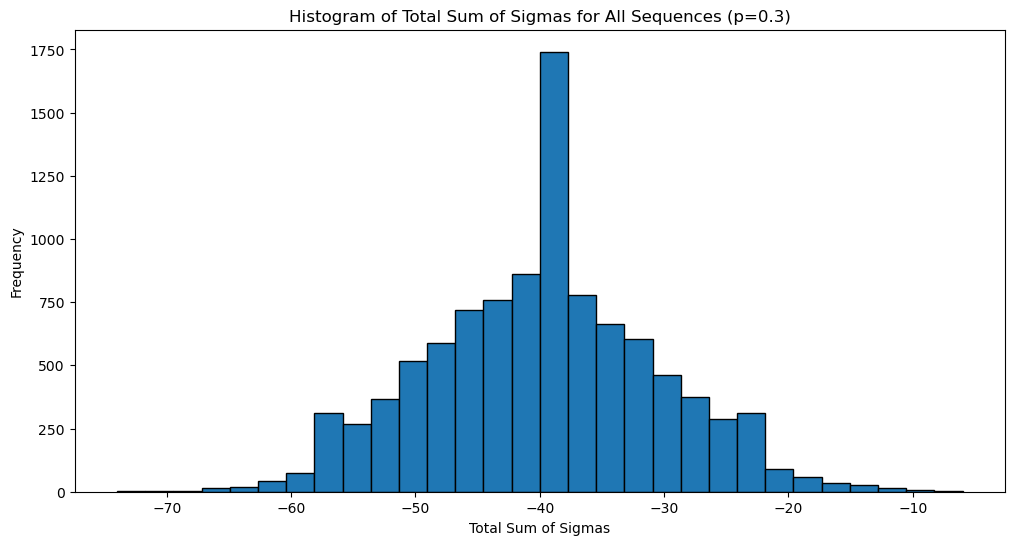

In [2]:


# Parameters
S = 10000  # Number of samples
N = 100   # Length of each sequence
Q = 100  # Number of sequences to plot

# Parameters for the biased coin
p = 0.3  # Probability of getting +1 (heads)
q = 1 - p  # Probability of getting -1 (tails)

# Generate S samples of N biased coin flips
biased_coin_flips = np.random.choice([1, -1], (S, N), p=[p, q])

# Plot 1: Sum of sigma_j from j=1 to k for Q of the S sequences (with biased coin)
plt.figure(figsize=(12, 6))
for i in range(Q):
    plt.plot(np.cumsum(biased_coin_flips[i, :]), label=f'Sequence {i+1}')
plt.xlabel('k')
plt.ylabel('Cumulative Sum of Sigma_j')
plt.title(f'Cumulative Sum of Biased Coin Flips for Q Sequences (p={p})')
plt.show()

# Plot 2: Histogram of the total sum of the sigmas of all sequences (with biased coin)
biased_total_sums = np.sum(biased_coin_flips, axis=1)
plt.figure(figsize=(12, 6))
plt.hist(biased_total_sums, bins=30, edgecolor='black')
plt.xlabel('Total Sum of Sigmas')
plt.ylabel('Frequency')
plt.title(f'Histogram of Total Sum of Sigmas for All Sequences (p={p})')
plt.show()


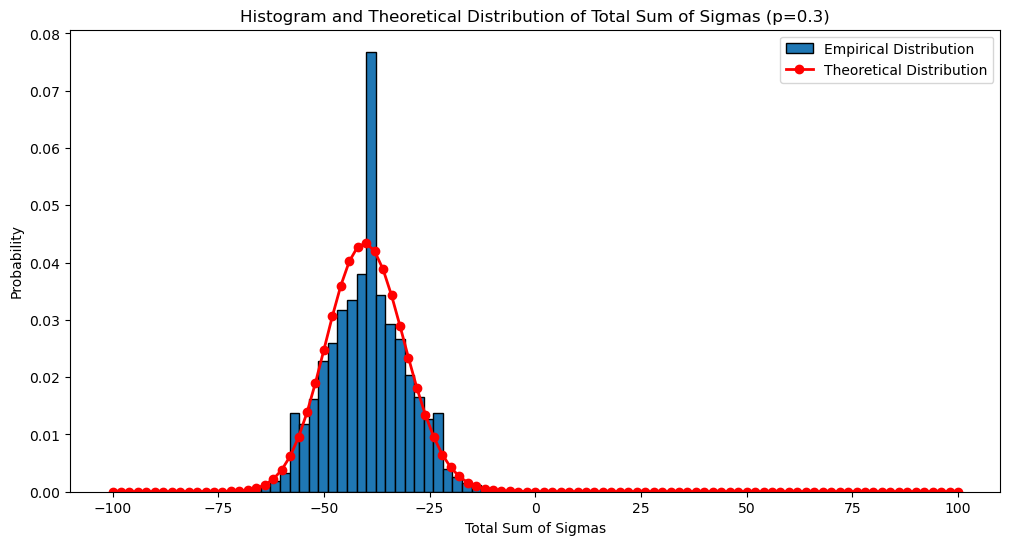

In [3]:
from scipy.stats import binom

# Theoretical expectation for the probability distribution of the sum of sigmas
# The sum of S sigmas is equivalent to the number of heads minus the number of tails.
# This can be modeled by a binomial distribution, where 'success' is getting a head (+1).
# The total sum can range from -N (all tails) to +N (all heads).
# The probability of k heads is binom.pmf(k, N, p), where k ranges from 0 to N.

# Adjusting k to represent the sum of sigmas: k heads and N-k tails gives a sum of 2k-N.
# The theoretical probabilities need to be scaled accordingly.
theoretical_probs = [binom.pmf(k, N, p)/2 for k in range(N + 1)]
scaled_sums = np.array([2 * k - N for k in range(N + 1)])

# Plotting the histogram with the theoretical distribution
plt.figure(figsize=(12, 6))
plt.hist(biased_total_sums, bins=30, edgecolor='black', density=True, label='Empirical Distribution')
plt.plot(scaled_sums, theoretical_probs, color='red', marker='o', linestyle='-', linewidth=2, label='Theoretical Distribution')
plt.xlabel('Total Sum of Sigmas')
plt.ylabel('Probability')
plt.title(f'Histogram and Theoretical Distribution of Total Sum of Sigmas (p={p})')
plt.legend()
plt.show()
